DSC 680 T301 T302 2253 Winter 2025
Chitramoy Mukherjee
Date : 12/16/2024
DSC-680 Project 1

Data Preparation :



In [175]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [177]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': 'lavender'}, style='darkgrid')

In [179]:
# Load the Heart Disease Classification Dataset csv file
heart_disease_classification_data = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-680\\Project-1\\Heart_Disease_Classification_Dataset.csv')

In [181]:
# Preview the dataframe heart_disease_classification_data
heart_disease_classification_data.head(5)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160,1.80,0.012,negative
1,21,1,94,98,46,296,6.75,1.060,positive
2,55,1,64,160,77,270,1.99,0.003,negative
3,64,1,70,120,55,270,13.87,0.122,positive
4,55,1,64,112,65,300,1.08,0.003,negative


In [183]:
# Load the Cardiovascular Disease Dataset csv file
cardiovascular_disease_data =pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-680\\Project-1\\Cardiovascular_Disease_Dataset.csv')

In [185]:
# Preview the dataframe cardiovascular_disease_data
cardiovascular_disease_data.head(5)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [187]:
# Load the Heart Disease Dataset csv file
heart_disease_data = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-680\\Project-1\\heart_disease.csv')

In [189]:
# Preview the dataframe
heart_disease_data.head(5)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [191]:
# Load the Final Heart Disease Dataset csv file
heart_disease_final_data = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-680\\Project-1\\heart_disease_final_data.csv')

In [193]:
# Preview the dataframe heart_disease_final_data
heart_disease_final_data.head(5)

,age,gender,blood_pressure,heart_stroke
0,64,Male,160,0
1,55,Male,160,0
2,64,Male,120,1
3,55,Male,112,0
4,58,Female,112,0


In [195]:
# Total record count
len(heart_disease_final_data)

6323

In [197]:
#Show top 30 rows
heart_disease_final_data.head(30)

,age,gender,blood_pressure,heart_stroke
0,64,Male,160,0
1,55,Male,160,0
2,64,Male,120,1
3,55,Male,112,0
4,58,Female,112,0
5,32,Female,179,0
6,63,Male,214,1
7,44,Female,154,0
8,67,Male,160,0
9,44,Female,166,0


In [199]:
## display summary of the dataset using describe function
heart_disease_final_data.describe(include='all')

,age,gender,blood_pressure,heart_stroke
count,6323.000000,6323,6323.000000,6323.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,3278,NaN,NaN
mean,51.840266,NaN,133.672624,0.303021
std,10.897241,NaN,25.029424,0.459600
min,30.000000,NaN,42.000000,0.000000
25%,43.000000,NaN,116.000000,0.000000
50%,51.000000,NaN,129.000000,0.000000
75%,60.000000,NaN,147.000000,1.000000


In [201]:
# Generating training indices
train_indices = np.random.choice(
    heart_disease_final_data.index, 
    size=int(0.7 * len(heart_disease_final_data)), 
    replace=False
)

# Splitting the dataset
heart_disease_final_data_train = heart_disease_final_data.loc[train_indices]
heart_disease_final_data_test = heart_disease_final_data.drop(train_indices)

In [203]:
# Creating a contingency table
contingency_table = pd.crosstab(
    heart_disease_final_data_train['gender'], 
    heart_disease_final_data_train['heart_stroke']
)

print(contingency_table)

heart_stroke     0    1
gender                 
Female        1644  459
Male          1414  909


In [205]:
mean_age_heart_stroke = heart_disease_final_data_train.loc[
    (heart_disease_final_data_train['heart_stroke'] == 1) & 
    (heart_disease_final_data_train['gender'] == 'Male'), 
    'age'
].mean(skipna=True)

In [207]:
print(f"Mean age of Male individuals with heart strokes: {mean_age_heart_stroke:.2f} years")

Mean age of Male individuals with heart strokes: 55.76 years


In [209]:
mean_age_heart_stroke = heart_disease_final_data_train.loc[
    (heart_disease_final_data_train['heart_stroke'] == 1) & 
    (heart_disease_final_data_train['gender'] == 'Female'), 
    'age'
].mean(skipna=True)

In [211]:
print(f"Mean age of Female individuals with heart strokes: {mean_age_heart_stroke:.2f} years")

Mean age of Female individuals with heart strokes: 57.79 years


In [213]:
# Filter data for heart_stroke = 1
with_heart_stroke_data = heart_disease_final_data_train[
    heart_disease_final_data_train['heart_stroke'] != 0
]

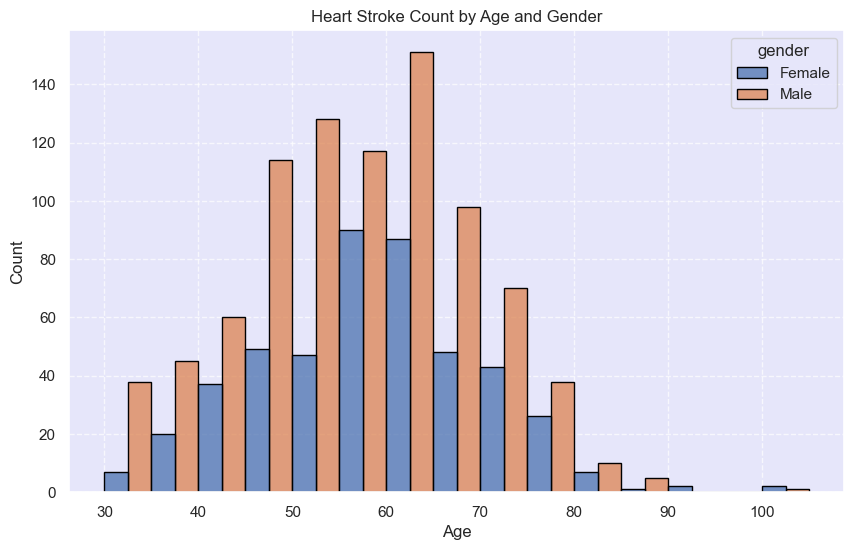

In [71]:
# Create a histogram to show heart stroke count by age and gender
plt.figure(figsize=(10, 6))
sns.histplot(
    data=with_heart_stroke_data, 
    x='age', 
    hue='gender', 
    bins=range(int(with_heart_stroke_data['age'].min()), int(with_heart_stroke_data['age'].max()) + 5, 5), 
    multiple='dodge', 
    edgecolor='black'
)

# Add labels and title
plt.title("Heart Stroke Count by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

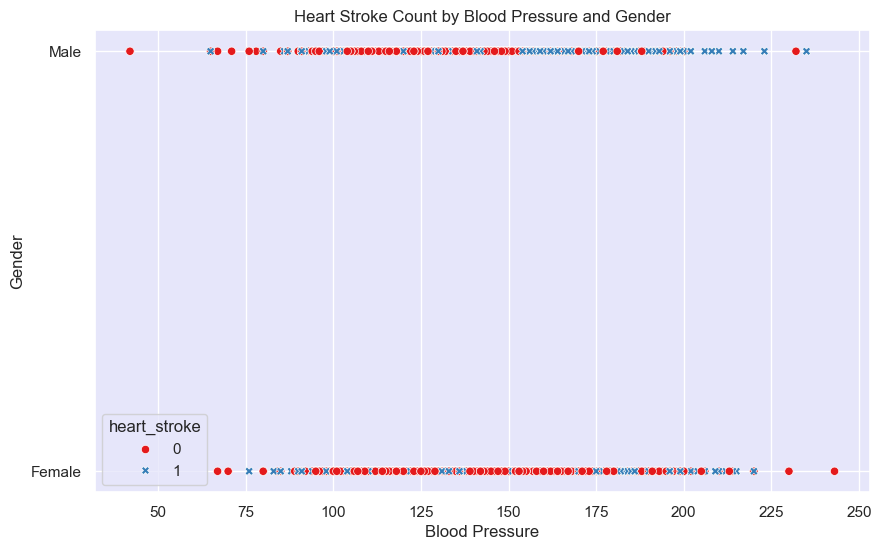

In [215]:
# Create a plot to show heart stroke count by blood pressure and gender
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=heart_disease_final_data_train,
    x='blood_pressure', 
    y='gender', 
    hue='heart_stroke', 
    palette='Set1', 
    style='heart_stroke', 
    legend='full'
)

# Add labels and title
plt.title("Heart Stroke Count by Blood Pressure and Gender")
plt.xlabel("Blood Pressure")
plt.ylabel("Gender")
plt.show()


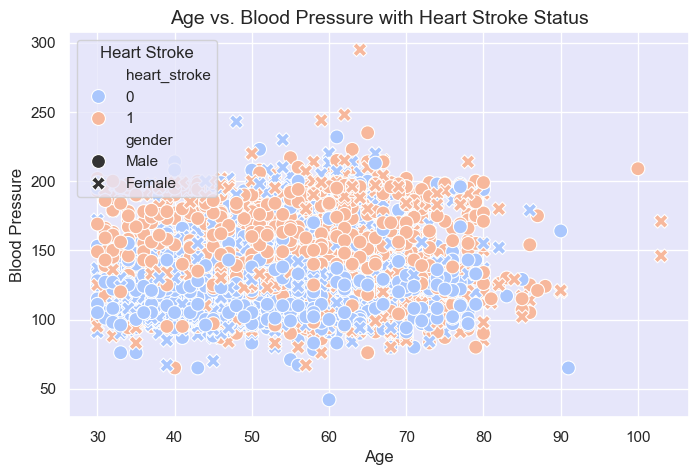

In [217]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='age', 
    y='blood_pressure', 
    hue='heart_stroke', 
    style='gender', 
    data=heart_disease_final_data, 
    palette='coolwarm', 
    s=100
)
plt.title('Age vs. Blood Pressure with Heart Stroke Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.legend(title='Heart Stroke', loc='upper left')
plt.show()


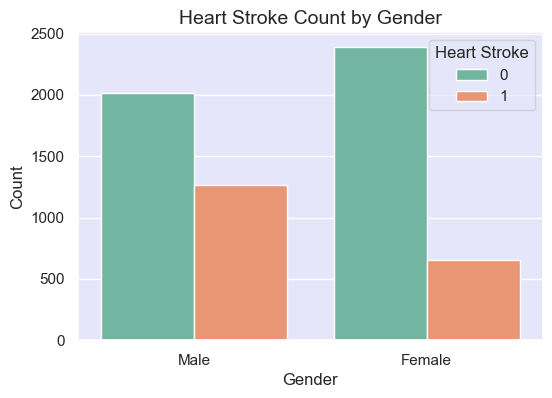

In [219]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='heart_stroke', data=heart_disease_final_data, palette='Set2')
plt.title('Heart Stroke Count by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Stroke', loc='upper right')
plt.show()


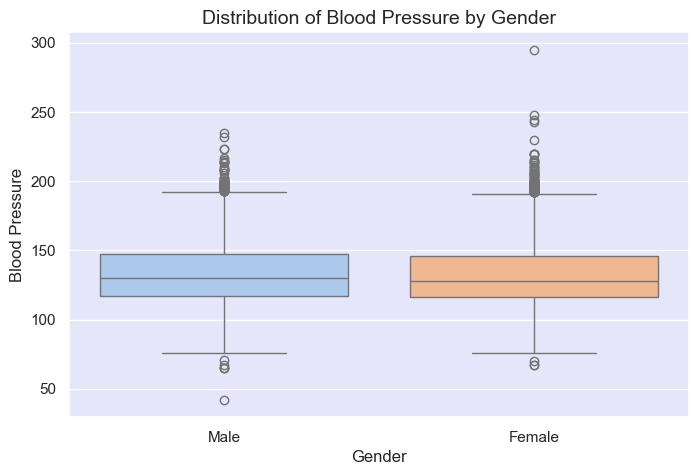

In [221]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='blood_pressure', data=heart_disease_final_data, palette='pastel')
plt.title('Distribution of Blood Pressure by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.show()


In [223]:
# Creating a correlation matrix
correlation_matrix = with_heart_stroke_data[['age', 'blood_pressure']].corr()

# Printing the correlation matrix
print(correlation_matrix)

                    age  blood_pressure
age             1.00000        -0.02364
blood_pressure -0.02364         1.00000


In [225]:
# Computing the correlation between blood_pressure and heart_stroke
correlation = heart_disease_final_data_train['blood_pressure'].corr(heart_disease_final_data_train['heart_stroke'])

# Printing the correlation value
print(correlation)


0.21650579759113942


In [227]:
# Computing the correlation between age and heart_stroke
correlation_age = heart_disease_final_data_train['age'].corr(heart_disease_final_data_train['heart_stroke'])

# Display the correlation coefficient
print(f"Pearson Correlation Coefficient: {correlation_age:.2f}")

Pearson Correlation Coefficient: 0.29


In [229]:
# Encode 'gender' as numeric
le = LabelEncoder()
heart_disease_final_data['gender'] = le.fit_transform(heart_disease_final_data['gender'])

# Check for missing values and drop them if present
heart_disease_final_data = heart_disease_final_data.dropna()

# Define features (X) and target (y)
X = heart_disease_final_data[['age', 'gender', 'blood_pressure']]
y = heart_disease_final_data['heart_stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [165]:
# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_log:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression:
Accuracy: 0.72
Confusion Matrix:
[[1219   88]
 [ 450  140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1307
           1       0.61      0.24      0.34       590

    accuracy                           0.72      1897
   macro avg       0.67      0.58      0.58      1897
weighted avg       0.69      0.72      0.67      1897



In [231]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.71
Confusion Matrix:
[[1069  238]
 [ 318  272]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1307
           1       0.53      0.46      0.49       590

    accuracy                           0.71      1897
   macro avg       0.65      0.64      0.64      1897
weighted avg       0.70      0.71      0.70      1897



In [233]:
# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.69
Confusion Matrix:
[[1307    0]
 [ 590    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1307
           1       0.00      0.00      0.00       590

    accuracy                           0.69      1897
   macro avg       0.34      0.50      0.41      1897
weighted avg       0.47      0.69      0.56      1897



In [235]:
# Display the accuracy of all models
print("Model Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Support Vector Machine Accuracy: {accuracy_svm:.2f}")

Model Comparison:
Logistic Regression Accuracy: 0.72
Random Forest Accuracy: 0.71
Support Vector Machine Accuracy: 0.69
